In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [ ]:
dir_baseline = '../checkpoints/result/'
dir_density_rgbW_nK = '../checkpoints/result_density_rgbW_np/'
dir_density_rgbW = '../checkpoints/result_density_rgbW/'
dir_density_GMM = '../checkpoints/result_GMM/'
datasets = ['Beauty', 'HoneyBee', 'Jockey']

methods = {
    # "Baseline (Static K-frame selection)": dir_baseline,
    "Removal control (Static K-frame selection)": dir_density_rgbW,
    # "Removal control (No K-frame selection)": dir_density_rgbW_nK,
}
data = {dataset: {method: [] for method in methods} for dataset in datasets}
data_K_frames = {dataset: [] for dataset in datasets}

In [3]:
for method_name, dir_path in methods.items():
    for dataset in datasets:
        file_path = os.path.join(dir_path, dataset, "train.txt")
        with open(file_path, 'r') as file:
            lines = file.readlines()
            # 跳过最后一行的平均值，只读帧数据
            for line in lines[:-1]:
                match = re.search(r"Frame_\d+:.*PSNR:([\d.]+)", line)
                if match:
                    psnr = float(match.group(1))
                    data[dataset][method_name].append(psnr)
# for dataset in datasets:
#     file_path = os.path.join(dir_path, dataset, "K_frames.txt")
#     with open(file_path, "r") as f:
#         data_K_frames[dataset] = [int(line.strip()) for line in f.readlines()]

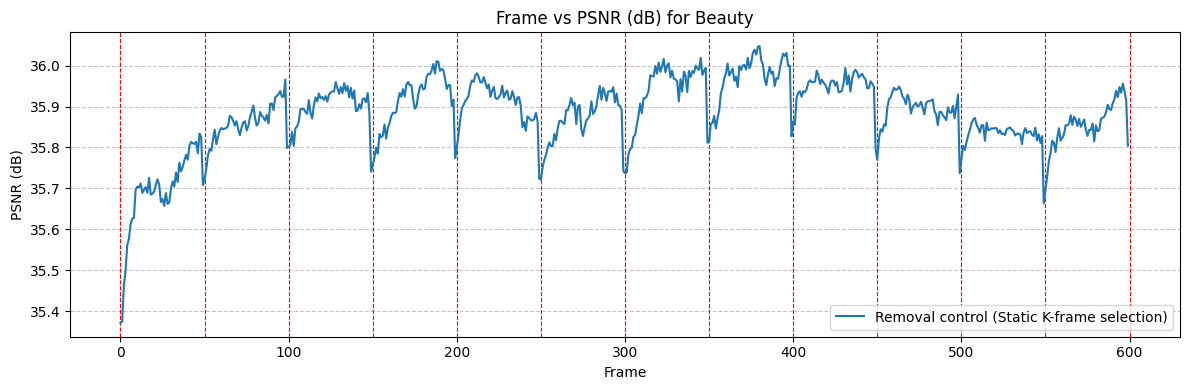

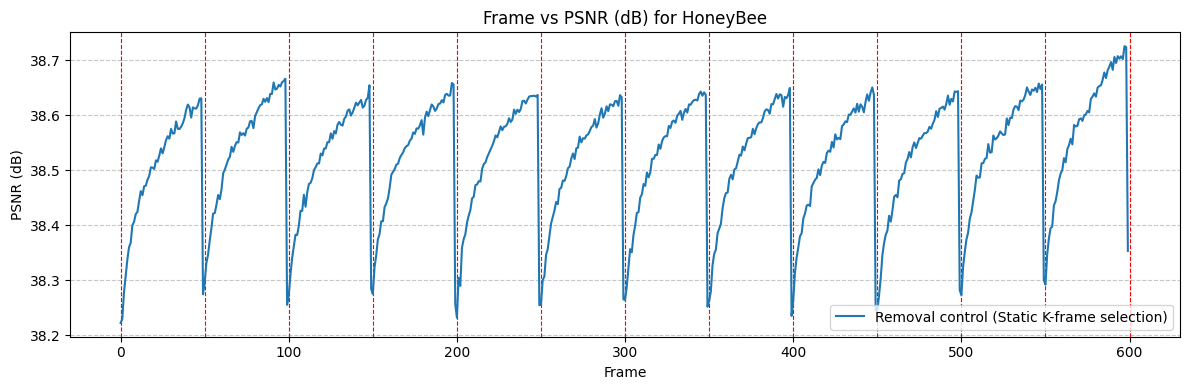

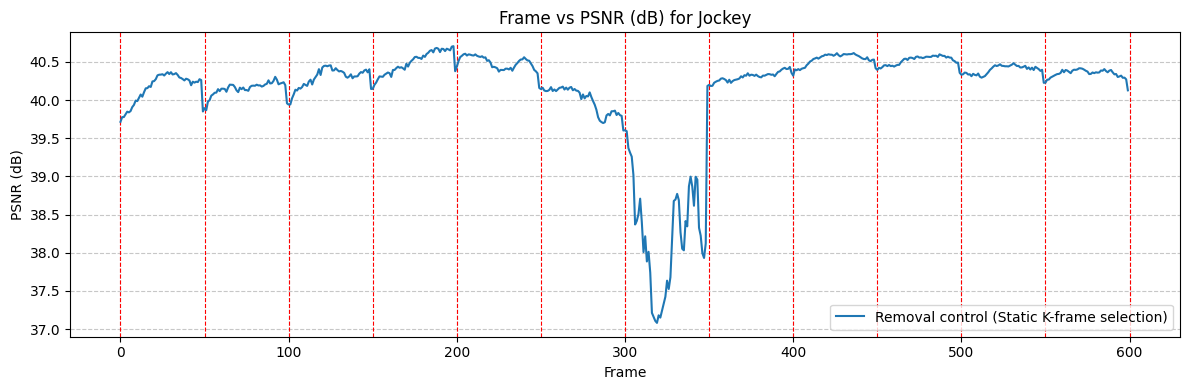

In [4]:
for dataset in datasets:
    plt.figure(figsize=(12, 4))
    for x in range(0, 601):
        if x in data_K_frames[dataset]:
            plt.axvline(x=x, color='yellow', linestyle='--', linewidth=0.8)
    # 添加每隔50帧的红色竖线
    for x in range(0, 601, 50):
        plt.axvline(x=x, color='red', linestyle='--', linewidth=0.8)
    for method_name, psnr_values in data[dataset].items():
        plt.plot(psnr_values, label=method_name, linewidth=1.5)
    
    
    

    
    plt.xlabel('Frame')
    plt.ylabel('PSNR (dB)')
    plt.title(f'Frame vs PSNR (dB) for {dataset}')
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()